In [13]:
#Importing Libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to /home/abad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Authorization and Search tweets
#Getting authorization
consumer_key = 'n0J0npvqSGd52JzD6JRmggWhL'
consumer_key_secret = 'xhw95jEpWBbCDVjz6YBKrX2tD87Le3yJLiGzgD2i0fVJKkBSyS'
access_token = '1060481990091145216-kpcq4Hbd3gGeiT2cefTawKnmJtBuud'
access_token_secret = 'V7Kpr7NX20SxhB1kdZjLdtN1MaQ9mEFDfSu2rzLEQXRDZ'
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#Defining Search keyword and number of tweets and searching tweets
query = 'umby'
max_tweets = 500
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

In [15]:
#Sentiment Analysis Report
#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
neu = 0
for tweet in searched_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0.0:
       pos = pos +1
    elif analysis.sentiment[0]<0.0:
       neg = neg + 1
    else:
       neu = neu + 1

Sentiment Result
Total Tweets =  197 Tweets
positive :  48 (24.365482233502537 %)
negative :  27 (13.705583756345177 %)
netral :  122 (61.92893401015228 %)


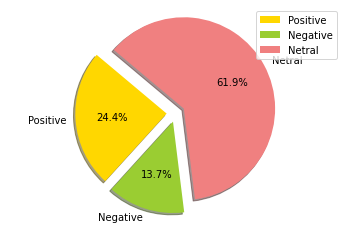

In [23]:
print("Sentiment Result")
print("Total Tweets = ", len(searched_tweets),("Tweets"))
print("positive : ", pos, "({} %)".format(pos*100/len(searched_tweets)))
print("negative : ", neg, "({} %)".format(neg*100/len(searched_tweets)))
print("netral : ", neu, "({} %)".format(neu*100/len(searched_tweets)))

#Plotting sentiments
labels = 'Positive', 'Negative', 'Netral'
sizes = [pos, neg, neu]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0.1, 0.1)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.savefig('umby.png')
plt.legend(loc="best")
plt.axis('equal')
plt.show()

In [18]:
users_locs = [[tweet.text ] for tweet in searched_tweets]

In [19]:
df = pd.DataFrame(data=users_locs, columns=['text'])

In [20]:
def clean_tweet(tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

In [21]:
df['text'] = df['text'].apply(clean_tweet)

In [22]:
df = df.to_csv('mercubuana.csv', index=False)
print (df)

None
